Quels sont les critères impactant l'admission d'un néo bachelier boursier ?

!pip install dash

## 1. Importation sous forme de DataFrame

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

url = "https://raw.githubusercontent.com/Projet-Filiere-ADAD/Projet_ADAD/main/Donn%C3%A9es/fr-esr-parcoursup_2018-2024.csv"
df = pd.read_csv(url, sep=';')

# Affichage du DataFrame
#display(df)

/tmp/ipykernel_18807/2876742758.py:10: DtypeWarning:

Columns (42,43,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.



On est passé de 13869 lignes à 90022 lignes sur le nouveau fichier !

In [2]:
list(df.columns.values)

['Session',
 'Établissement',
 'Département de l’établissement',
 'Région de l’établissement',
 'Académie de l’établissement',
 'Filière de formation très agrégée',
 'Filière de formation',
 'Filière de formation détaillée',
 'Filière de formation très détaillée',
 'Coordonnées GPS de la formation',
 'Effectif total des candidats pour une formation',
 'Effectif total des candidats en phase principale',
 'Effectif des candidats néo bacheliers généraux en phase principale',
 'Dont effectif des candidats boursiers néo bacheliers généraux en phase principale',
 'Effectif des candidats néo bacheliers technologiques en phase principale',
 'Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale',
 'Effectif des candidats néo bacheliers professionnels en phase principale',
 'Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale',
 'Effectif total des candidats classés par l’établissement en phase principale',
 'Effectif des can

In [44]:
df.loc[~df["Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement"].isnull(), "Session"].unique()

array([2021, 2022, 2023, 2024])

Colonnes utiles: Session, Région de l'établissement, Filière de formation très agrégée, Coordonnées GPS de la formation, Statut de l’établissement de la filière de formation (public, privé…)

In [25]:
# Regrouper les filières PASS, PACES et LAS
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('PASS', 'PACES/PASS/LAS')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('PACES', 'PACES/PASS/LAS')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('Licence_Las', 'PACES/PASS/LAS')

# Regrouper les écoles de commerce et d'ingénieur
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('Ecole de Commerce', 'Grandes écoles')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace("Ecole d'Ingénieur", 'Grandes écoles')

In [45]:
df["Néo bacheliers en phase principale"] = df['Effectif des candidats néo bacheliers généraux en phase principale']+df['Effectif des candidats néo bacheliers technologiques en phase principale']+df['Effectif des candidats néo bacheliers professionnels en phase principale']
df["Néo bacheliers boursiers en phase principale"] = df['Dont effectif des candidats boursiers néo bacheliers généraux en phase principale']+df['Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale']+df['Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale']
df["% boursiers en phase principale"] = df["Néo bacheliers boursiers en phase principale"]/df["Néo bacheliers en phase principale"]*100

df["Néo bacheliers classés"] = df['Effectif des candidats néo bacheliers généraux classés par l’établissement']+df['Effectif des candidats néo bacheliers technologiques classés par l’établissement']+df['Effectif des candidats néo bacheliers professionnels classés par l’établissement']
df["Néo bacheliers boursiers classés"] = df['Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement']+df['Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement']+df['Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement']
df["% boursiers classés"] = df["Néo bacheliers boursiers classés"]/df["Néo bacheliers classés"]*100

df["Néo bacheliers proposition"] = df['Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement']+df['Effectif des candidats en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement']+df['Effectif des candidats en terminale professionnelle ayant reçu une proposition d’admission de la part de l’établissement']
df["Néo bacheliers boursiers proposition"] = df['Dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d’admission de la part de l’établissement']+df['Dont effectif des candidats boursiers en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement']+df['Dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d’admission de la part de l’établissement']
df["% boursiers proposition"] = df["Néo bacheliers boursiers proposition"]/df["Néo bacheliers proposition"]*100

df["% boursiers admis"] = df["Dont effectif des admis boursiers néo bacheliers"]/df["Effectif des admis néo bacheliers"]

df["% boursiers admis / candidats"] = df["Dont effectif des admis boursiers néo bacheliers"]/df["Néo bacheliers boursiers en phase principale"]*100
df["% boursiers admis / classés"] = df["Dont effectif des admis boursiers néo bacheliers"]/df["Néo bacheliers boursiers classés"]*100
df["% boursiers admis / proposition"] = df["Dont effectif des admis boursiers néo bacheliers"]/df["Néo bacheliers boursiers proposition"]*100
df["% boursiers proposition / candidats"] = df["Néo bacheliers boursiers proposition"]/df["Néo bacheliers boursiers en phase principale"]*100
df["% boursiers classés / candidats"] = df["Néo bacheliers boursiers classés"]/df["Néo bacheliers boursiers en phase principale"]*100

# Remplacer les valeurs infinies par des NaN
df = df.replace([np.inf, -np.inf], np.nan)

## 2. Évolution temporelle des taux de boursiers


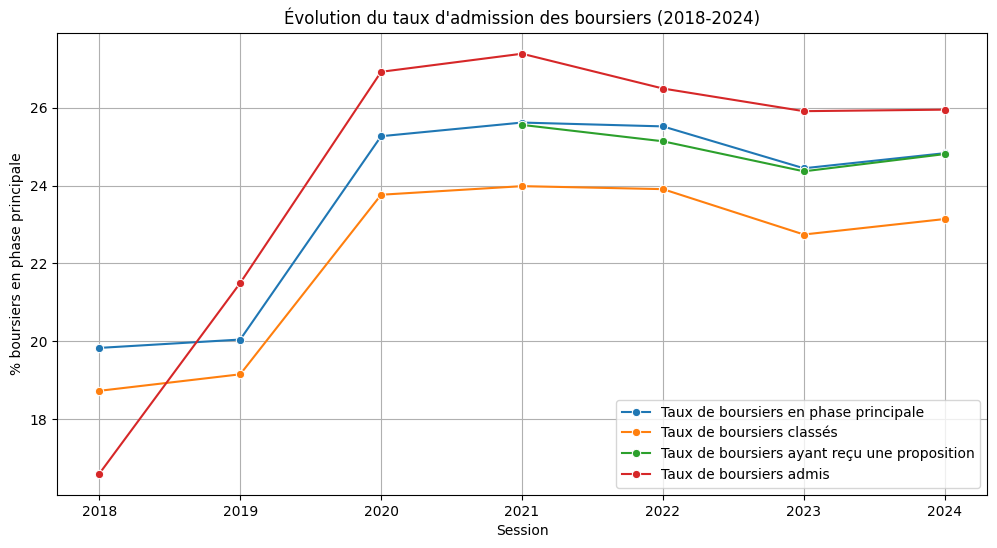

In [5]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df.groupby('Session')['% boursiers en phase principale'].mean().reset_index(),
    x='Session',
    y='% boursiers en phase principale',
    marker='o',
    label='Taux de boursiers en phase principale',
)
sns.lineplot(
    data=df.groupby('Session')['% boursiers classés'].mean().reset_index(),
    x='Session',
    y='% boursiers classés',
    marker='o',
    label='Taux de boursiers classés',
)
sns.lineplot(
    data=df.groupby('Session')['% boursiers proposition'].mean().reset_index(),
    x='Session',
    y='% boursiers proposition',
    marker='o',
    label='Taux de boursiers ayant reçu une proposition',
)
sns.lineplot(
    data=df.groupby('Session')['% d’admis néo bacheliers boursiers'].mean().reset_index(),
    x='Session',
    y='% d’admis néo bacheliers boursiers',
    marker='o',
    label='Taux de boursiers admis',
)
plt.title("Évolution des taux de boursiers (2018-2024)")
plt.xlabel("Année")
plt.ylabel("Taux de boursiers")
plt.legend()
plt.grid(True)

In [34]:
# Création d'une application Dash
app = Dash(__name__)

# Application Layout
app.layout = html.Div([
    html.H1("Proportion d'admis boursiers par rapport aux candidats boursiers par an, par filière de formation, par Région et par statut de l'établissement", style={'text-align': 'center'}),

    # Dropdown pour sélectionner une région
    dcc.Dropdown(
        id='region-selector',
        options=[{'label': region, 'value': region} for region in list(df['Région de l’établissement'].unique())+["France"]],
        value='France',  # Région par défaut
        placeholder="Sélectionnez une région",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown pour sélectionner le statut de l'établissement
    dcc.Dropdown(
        id='statut-selector',
        options=[{'label': statut, 'value': statut} for statut in list(df['Statut de l’établissement de la filière de formation (public, privé…)'].unique())+["Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un statut",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Graphique interactif
    dcc.Graph(id='boursiers-graph')
])

# Callback pour mettre à jour le graphique en fonction de la région et du statut sélectionnés
@app.callback(
    Output('boursiers-graph', 'figure'),
    [Input('region-selector', 'value'), Input('statut-selector', 'value')]
)
def update_graph(selected_region, selected_statut):
    # Filtrer les données par région
    if selected_region == 'France':
        filtered_df = df
    else:
        filtered_df = df[df['Région de l’établissement'] == selected_region]
    
    # Filtrer les données par région et statut
    if selected_statut == 'Tous':
        filtered_df = filtered_df
    else:
        filtered_df = filtered_df[filtered_df['Statut de l’établissement de la filière de formation (public, privé…)'] == selected_statut]

    # Calcul de la proportion moyenne par filière
    filtered_df = (
        filtered_df.groupby(['Session',"Filière de formation très agrégée"])[['% boursiers admis / candidats']]
        .mean()
        .sort_values(by='Session', ascending=False)
    ).reset_index()

    # Créer un graphique interactif avec Plotly
    fig = px.line(
        filtered_df,
        x='Session',
        y='% boursiers admis / candidats',
        color='Filière de formation très agrégée',
        title=f"Proportion d'admis boursiers par rapport aux candidats boursiers par an et filière de formation selon la Région ({selected_region}) et le statut de l'établissement ({selected_statut})",
        labels={'% d’admis néo bacheliers boursiers': 'Proportion d’admis boursiers par rapport aux candidats boursiers'},
        markers=True
    )
    fig.update_layout(
        xaxis_title="Session",
        yaxis_title="Proportion admis boursiers / candidats boursiers (en %)",
        legend_title_text='Filières de formation'  # Changer le titre de la légende ici
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)

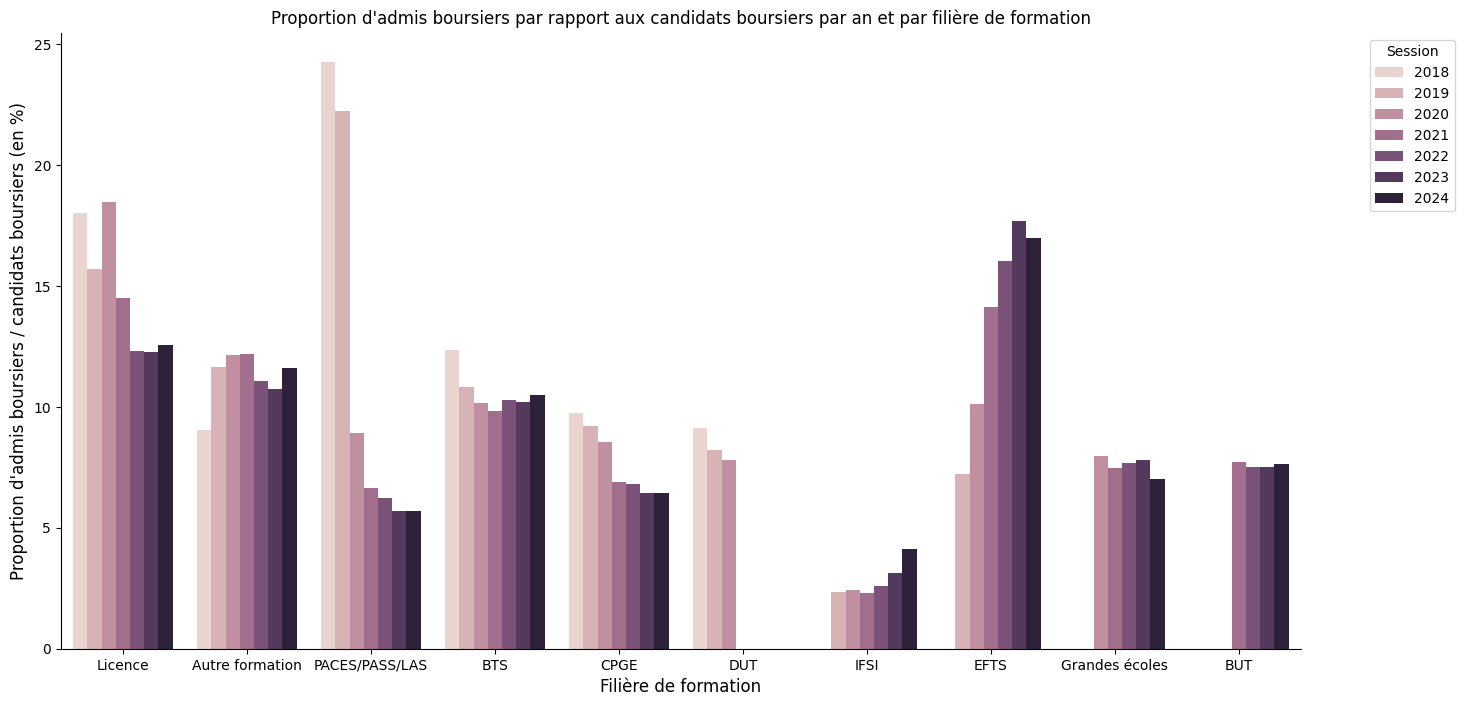

In [ ]:
plt.figure(figsize=(16, 8))

ax2 = sns.barplot(
    data=df,
    x='Filière de formation très agrégée',
    y='% boursiers admis / candidats',
    #estimator=mean,
    errorbar=None,
    #palette='rocket',
    hue='Session',
    #dodge=True
)
plt.title("Proportion d'admis boursiers par rapport aux candidats boursiers par an et par filière de formation")
plt.xlabel("Filière de formation", fontsize=12)
plt.ylabel("Proportion d'admis boursiers / candidats boursiers (en %)", fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Session', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

In [46]:
# Création d'une application Dash
app = Dash(__name__)

# Application Layout
app.layout = html.Div([
    html.H1("Proportion d'élèves boursiers classés par rapport aux candidats boursiers par an et par filière de formation selon la Région, le statut de l'établissement et le type de baccalauréat", style={'text-align': 'center'}),

    # Dropdown pour sélectionner une région
    dcc.Dropdown(
        id='region-selector',
        options=[{'label': region, 'value': region} for region in list(df['Région de l’établissement'].unique())+["France"]],
        value='France',  # Région par défaut
        placeholder="Sélectionnez une région",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown pour sélectionner le statut de l'établissement
    dcc.Dropdown(
        id='statut-selector',
        options=[{'label': statut, 'value': statut} for statut in list(df['Statut de l’établissement de la filière de formation (public, privé…)'].unique())+["Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un statut",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Dropdown pour sélectionner le type de baccalauréat
    dcc.Dropdown(
        id='bac-selector',
        options=[{'label': bac, 'value': bac} for bac in ["Général", "Technologique", "Professionnel", "Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un type de baccalauréat",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Graphique interactif
    dcc.Graph(id='boursiers-graph')
])

# Callback pour mettre à jour le graphique en fonction de la région et du statut sélectionnés
@app.callback(
    Output('boursiers-graph', 'figure'),
    [Input('region-selector', 'value'), Input('statut-selector', 'value'), Input('bac-selector', 'value')]
)
def update_graph(selected_region, selected_statut, selected_bac):
    # Filtrer les données par région
    if selected_region == 'France':
        filtered_df = df
    else:
        filtered_df = df[df['Région de l’établissement'] == selected_region]
    
    # Filtrer les données par région et statut
    if selected_statut == 'Tous':
        filtered_df = filtered_df
    else:
        filtered_df = filtered_df[filtered_df['Statut de l’établissement de la filière de formation (public, privé…)'] == selected_statut]

    match selected_bac:
        case "Général":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers généraux en phase principale"]*100
        case "Technologique":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale"]*100
        case "Professionnel":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale"]*100
        case "Tous":
            filtered_df["% boursiers"] = filtered_df["% boursiers classés / candidats"]

    # Calcul de la proportion moyenne par filière
    filtered_df = (
        filtered_df.groupby(['Session',"Filière de formation très agrégée"])[['% boursiers']]
        .mean()
        .sort_values(by='Session', ascending=False)
    ).reset_index()

    # Créer un graphique interactif avec Plotly
    fig = px.line(
        filtered_df,
        x='Session',
        y='% boursiers',
        color='Filière de formation très agrégée',
        title=f"Proportion de boursiers classés par rapport aux candidats boursiers par an et par filière de formation selon la Région ({selected_region}), le statut de l'établissement ({selected_statut}) et le type de baccalauréat ({selected_bac})",
        labels={'% boursiers': 'Proportion de boursiers classés par rapport aux candidats boursiers'},
        markers=True
    )
    fig.update_layout(
        xaxis_title="Session",
        yaxis_title="Proportion boursiers classés / candidats boursiers (en %)",
        legend_title_text='Filières de formation'  # Changer le titre de la légende ici
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)


In [48]:
# Création d'une application Dash
app = Dash(__name__)

# Application Layout
app.layout = html.Div([
    # Dropdown pour sélectionner une région
    dcc.Dropdown(
        id='region-selector',
        options=[{'label': region, 'value': region} for region in list(df['Région de l’établissement'].unique()) + ["France"]],
        value='France',  # Région par défaut
        placeholder="Sélectionnez une région",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown pour sélectionner le statut de l'établissement
    dcc.Dropdown(
        id='statut-selector',
        options=[{'label': statut, 'value': statut} for statut in list(df['Statut de l’établissement de la filière de formation (public, privé…)'].unique()) + ["Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un statut",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Dropdown pour sélectionner le type de baccalauréat
    dcc.Dropdown(
        id='bac-selector',
        options=[{'label': bac, 'value': bac} for bac in ["Général", "Technologique", "Professionnel", "Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un type de baccalauréat",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Dropdown pour sélectionner la session
    dcc.Dropdown(
        id='session-selector',
        options=[{'label': session, 'value': session} for session in df['Session'].unique()],
        value=2024,  # Statut par défaut
        placeholder="Sélectionnez une session",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Graphique interactif
    dcc.Graph(id='boursiers-graph')
])

# Callback pour mettre à jour le graphique en fonction de la région et du statut sélectionnés
@app.callback(
    Output('boursiers-graph', 'figure'),
    [Input('region-selector', 'value'), Input('statut-selector', 'value'), Input('bac-selector', 'value'), Input('session-selector', 'value')]
)
def update_graph(selected_region, selected_statut, selected_bac, selected_session):
    # Filtrer les données par région
    if selected_region == 'France':
        filtered_df = df
    else:
        filtered_df = df[df['Région de l’établissement'] == selected_region]

    # Filtrer les données par statut
    if selected_statut != 'Tous':
        filtered_df = filtered_df[filtered_df['Statut de l’établissement de la filière de formation (public, privé…)'] == selected_statut]

    # Calculer le pourcentage de boursiers en fonction du type de bac
    match selected_bac:
        case "Général":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers généraux en phase principale"]*100
        case "Technologique":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale"]*100
        case "Professionnel":
            filtered_df["% boursiers"] = filtered_df["Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement"]/filtered_df["Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale"]*100
        case "Tous":
            filtered_df["% boursiers"] = filtered_df["% boursiers classés / candidats"]

    filtered_df = filtered_df[filtered_df['Session'] == selected_session]

    # Calcul de la proportion moyenne par filière
    filtered_df = (
        filtered_df.groupby(["Filière de formation très agrégée"])[['% boursiers']]
        .mean()
        .reset_index()
        .sort_values(by='% boursiers', ascending=False)
    )

    # Créer un graphique interactif avec Plotly
    fig = px.bar(
        filtered_df,
        x='Filière de formation très agrégée',
        y='% boursiers',
        color='% boursiers',
        color_continuous_scale='viridis',
        #barmode='group',
        title=f"Proportion de classés boursiers par rapport aux candidats boursiers par an et par filière de formation selon la Région ({selected_region}), le statut de l'établissement ({selected_statut}), le type de bac ({selected_bac}) et la session ({selected_session})",
        labels={'% boursiers': 'Proportion'}
    )
    fig.update_layout(
        xaxis_title="Filières de formation",
        yaxis_title="Proportion classés boursiers / candidats boursiers (en %)",
        legend_title_text='Sessions',
        #bargap=0.4, 
        #bargroupgap=0.4
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)


## 3. Proportion d'admis boursiers par filière et par région et par année

In [13]:
# Création d'une application Dash
app = Dash(__name__)

# Préparer les données (exemple de DataFrame)
# df = pd.read_csv("votre_fichier.csv") # Chargez vos données ici
df['Proportion_boursiers_filière_agrégée'] = (
    df['Dont effectif des admis boursiers néo bacheliers'] /
    df['Effectif des admis néo bacheliers']
)

# Liste des régions disponibles
regions = df['Région de l’établissement'].unique()
regions = ['France'] + list(regions)  # Ajouter "France" pour l'ensemble des régions

# Liste des années disponibles dans la colonne 'Session'
annees = df['Session'].unique()
annees = sorted(annees)  # Trier les années

# Application Layout
app.layout = html.Div([
    html.H1("Proportion d'admis boursiers par filière et par région", style={'text-align': 'center'}),

    # Dropdown pour sélectionner une région
    dcc.Dropdown(
        id='region-selector',
        options=[{'label': region, 'value': region} for region in regions],
        value='France',  # Région par défaut
        placeholder="Sélectionnez une région",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown pour sélectionner une année
    dcc.Dropdown(
        id='year-selector',
        options=[{'label': annee, 'value': annee} for annee in annees],
        value=annees[0],  # Année par défaut (la première année disponible)
        placeholder="Sélectionnez une année",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Graphique interactif
    dcc.Graph(id='boursiers-graph')
])

# Callback pour mettre à jour le graphique en fonction de la région et de l'année sélectionnées
@app.callback(
    Output('boursiers-graph', 'figure'),
    [Input('region-selector', 'value'), Input('year-selector', 'value')]
)
def update_graph(selected_region, selected_year):
    # Filtrer les données par région
    if selected_region == 'France':
        filtered_df = df
    else:
        filtered_df = df[df['Région de l’établissement'] == selected_region]

    # Filtrer les données par année
    filtered_df = filtered_df[filtered_df['Session'] == selected_year]

    # Calcul de la proportion moyenne par filière
    filière_agrégée_analysis = (
        filtered_df.groupby('Filière de formation très agrégée')[['Proportion_boursiers_filière_agrégée']]
        .mean()
        .sort_values(by='Proportion_boursiers_filière_agrégée', ascending=False)
    ).reset_index()

    # Créer un graphique interactif avec Plotly
    fig = px.bar(
        filière_agrégée_analysis,
        x='Filière de formation très agrégée',
        y='Proportion_boursiers_filière_agrégée',
        title=f"Proportion d'admis boursiers par filière ({selected_region}, {selected_year})",
        labels={'Proportion_boursiers_filière_agrégée': 'Proportion d’admis boursiers'},
        color='Proportion_boursiers_filière_agrégée',
        color_continuous_scale='viridis'
    )
    fig.update_layout(
        xaxis_title="Filière de formation très agrégée",
        yaxis_title="Proportion d'admis boursiers"
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)